# Veriye İlk Bakış

## Veri Setinin İncelenmesi

In [31]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [32]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [33]:
df = planets.copy()

In [36]:
df.head() # ilk baş

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [37]:
df.tail() # son 5

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [40]:
df.info() # veri setimiz hakkında özet bilgi verir
# object -> kategorik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [42]:
df.dtypes # değişkenlerin veri tipleri

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [44]:
import pandas as pd # pandas'ı import ediyoruz

df.method = pd.Categorical(df.method) # df içerisindeki 'method' sütununu (değişken) kategorik olarak set ediyoruz

df.dtypes # tekrar veri tiplerine bakıyoruz ve method'un category olarak değiştiğini görüyoruz

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi 

In [45]:
import seaborn as sns
planets = sns.load_dataset('planets')
df = planets.copy()

In [47]:
df.shape # gözlem ve değişken sayısı

(1035, 6)

In [48]:
df.columns # değişken isimlerine erişmek

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [49]:
df.describe() # betimsel istatistiklerini verir

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [50]:
df.describe().T # dataframe'in (matris) transpoze'unu alıp betimsel istatistikler

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


<b style="color:red;">!!UNUTMAYALIM!! describe() fonksiyonu eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır.</b>

In [54]:
df.describe(include='all').T # tüm değişkenleri alırız (kategorikler dahil) fakat çok anlamlı olmayacaktır

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


## Eksik Değerlerin İncelenmesi

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df.isnull().values.any()  # eksik gözlem var mı?
# isnull -> null/boş/eksik var mı
# values -> gözlemlerde
# any    -> bir tane bile/herhangi

True

In [9]:
df.isnull().sum() # değişkenlerdeki toplam eksik gözlem sayısı

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [13]:
df.orbital_period.fillna(0,inplace=True) # datafame'in orbital_period değişkenindeki(sütun) eksik gözlemleri 0 olarak set ediyoruz

In [17]:
df.orbital_period.isnull().any() # dataframe'in orbital_period sütununda boş değer var mı?

False

In [18]:
df.mass.fillna(df.mass.mean(),inplace=True) # dataframe'in mass sütunundaki eksik değerler yerine o sütunun ortalaması set edilir

In [21]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [23]:
df.fillna(df.mean(),inplace=True) # dataframe'in tüm eksik gözlemlerine, dataframe'in tüm gözlemlerinin ortalaması set edilir

In [24]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [28]:
df = planets.copy() # verisetini kopyalamıştık bu sayede geri getirebildik

In [29]:
df.isnull().sum() # değişkenlerdeki toplam eksik gözlem sayısı

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# Kategorik Değişken Özetleri

In [31]:
import seaborn as sns
planets = sns.load_dataset('planets')
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [38]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [47]:
cat_df = df.select_dtypes(include=['object','int64']) # dataframe içerisinden istediğimiz tipteki değişkenleri seçeriz

cat_df = df.select_dtypes(include=['object'])

In [48]:
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [50]:
cat_df.method.unique() # unique olarak sınıf isimlerini getirir

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [54]:
cat_df.method.value_counts().count() # toplam kaç sınıf var

10

In [56]:
cat_df.method.value_counts() # hangi sınıfta kaç gözlem(frekans) var

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

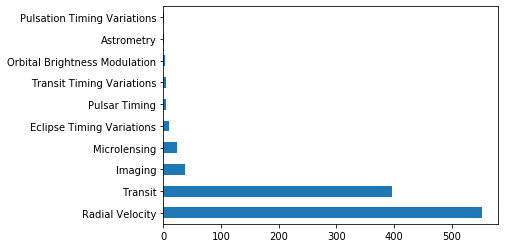

In [60]:
df.method.value_counts().plot.barh(); # kategorik değişkene göre sütun grafiği alırız

# Sürekli Değişken Özetleri

In [64]:
import seaborn as sns
planets = sns.load_dataset('planets')
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [66]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [68]:
num_df = df.select_dtypes(include=['float64','int64']) # ilgili tipteki değişkenleri seç

num_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [70]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [73]:
num_df.distance.describe() # sadece istediğimiz bir numeric değişkenin betimsel istatistiklerine de ulaşabiliriz

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

# Dağılım Grafikleri

## Veri Seti Hikayesi

In [76]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
df.info() # veri setimizi hızlıca gözden geçiriyoruz ve veri setini anlamaya çalışıyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [96]:
df.cut.value_counts() # cut değişkeninin sınıflarına ve frekanslarına bakıyoruz

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [97]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [100]:
# ordinal (sıralı- A>B) değişken tanımlama
from pandas.api.types import CategoricalDtype


In [101]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True)) # cut değişkenini categorical olarak set ettik ve sıralı (ordinal) olduğunu belirttik (True)

In [102]:
df.dtypes # tekrar veri tiplerine bakıyoruz

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [104]:
df.cut.head(1) # buradaki sıralama bizim veri seti hikayemizdeki sıralama ile eşleşmemektedir

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [91]:
ordinal_categories = ['Fair','Good','Very Good','Premium','Ideal'] # kategorileri kendi istediğimiz gibi sıralıyoruz

In [94]:
df.cut = df.cut.astype(CategoricalDtype(categories=ordinal_categories,ordered=True))
# kendi sıralamamız ile ilgili sütunu yeniden set ettik

In [95]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

## Barplot (Sütun Grafik)

- Kategorik değişkenleri görselleştirmek için kullanlır.

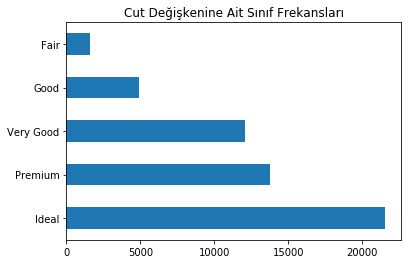

In [110]:
# matplotlib temelli pandas görselleştirme
(df.cut
 .value_counts()
 .plot.barh()
 .set_title('Cut Değişkenine Ait Sınıf Frekansları')); # grafiğe başlık eklememizi sağlar

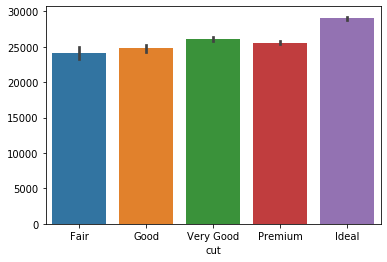

In [118]:
# seaborn görselleştirme

sns.barplot(x='cut',y=df.cut.index,data=df);

# x -> x eksenine hangi değişken gelecek
# y -> y eksenine hangi değerler gelecek (bu örnek için cut değişkeninin frekansları)
# data -> hangi dataframe ile çalışacağız

### Barplot Çaprazlamalar

- Veri seti içerisinde yer alan değişkenlerin birlikte değerlendirilmesidir

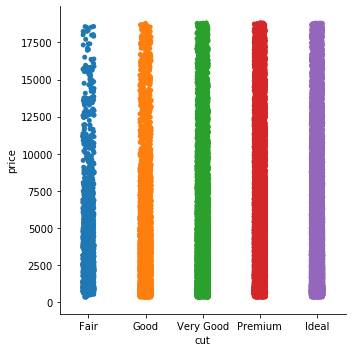

In [135]:
sns.catplot(x = 'cut', y = 'price', data = df);
# x -> x ekseninde 'cut' KATEGORİK değişkeni
# y -> y ekseninde 'price' SÜREKLİ değişkeni

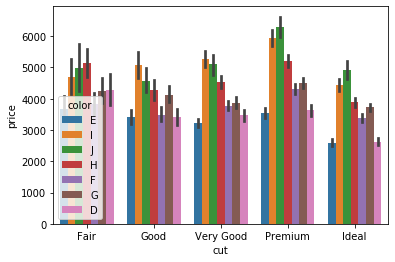

In [133]:
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df);
# hue ile birlikte grafiğimize bir boyut eklemiş oluyoruz, bu boyut python tarafından toplulaştırma (groupby) işlemi yapılarak eklenir

# x ekseninde 'cut' kategorik değişkenimiz var fakat bu sefer bu değişkenimiz 'color' kategorik değişkeninin sınıflarınca 'price' bazında parçalara ayrılmış


In [134]:
df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yoğunluk Grafikleri

- Sayısal değişkenlerin dağılımını görselleştirmek için kullanılır

In [137]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


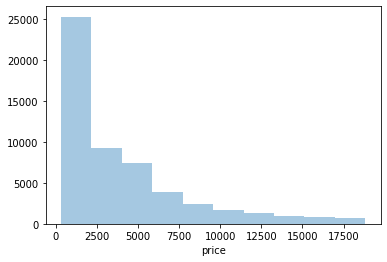

In [151]:
sns.distplot(df.price,kde=False,bins=10);
# hangi değişken (df.price)
# kde=False -> yoğunluğu eklemesini istemiyoruz
# bins -> kaç kutu kullanılarak bu grafik oluşturulacak

In [ ]:
# ?sns.distplot
# yardım almamızı sağlar

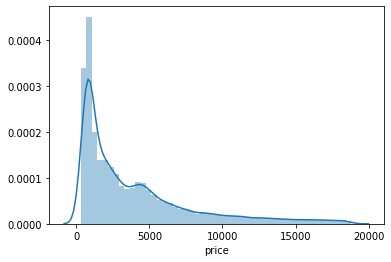

In [152]:
sns.distplot(df['price']);
# yoğunluğu dahil eder (default olarak True)

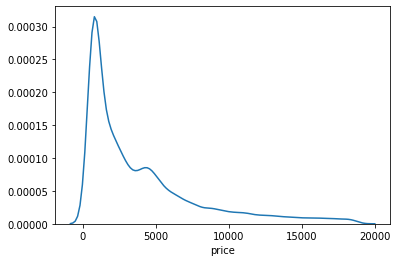

In [155]:
sns.distplot(df.price,hist=False);
# histogram grafiğini kapatır ve yalnızca yoğunluk grafiğini getirir

### Histogram ve Yoğunluk Grafikleri Çaprazlamalar

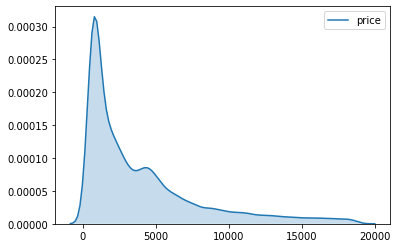

In [157]:
sns.kdeplot(df.price, shade=True);

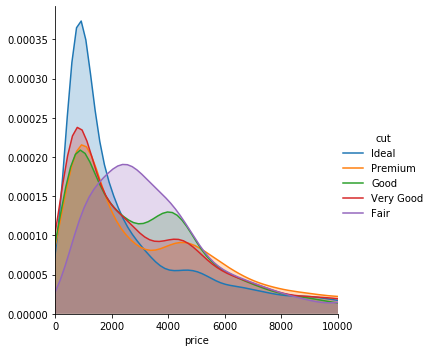

In [170]:
(sns.FacetGrid( # grafik üzerine eklenen boyutları bölerek göstermemizi sağlar
    df, # hangi veri seti
    hue='cut', # boyut ekliyoruz (dataframe'in cut değişkeni)
    height=5, # yükseklik için değer giriyoruz
    xlim=(0,10000)) # x eksenine 0 ile 10000 arasında değerler ekliyoruz
 .map(sns.kdeplot,'price',shade=True) # price'a göre kdeplot(yoğunluk) grafiği oluşturacağız ve her cut değişkenine göre eşleyeceğiz
 .add_legend() # sağ taraftaki bilgileri görünür kılıyoruz
);

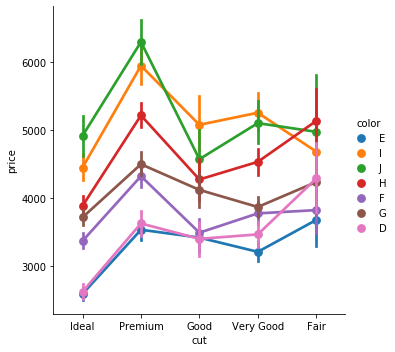

In [175]:
# 2 kategorik değişkenin price'a etkileri
sns.catplot(x='cut', # x ekseninde hangi değişken ve sınıfları
            y='price', # y ekseninde hangi değişken
            hue='color', # 
            kind='point', # tür'ü ne şekilde ifade edeceğimiz
            data=df); # hangi data

## Veri Seti Hikayesi

In [4]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe().T # betimsel istatistiklerini inceliyoruz

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df.sex.value_counts() # cinsiyet değişkeninin sınıflarını ve frekanslarına erişiyoruz

Male      157
Female     87
Name: sex, dtype: int64

In [8]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot (Kutu Grafik)
- Sayısal (sürekli) değişkenlerin dağılımını inceleriz
- Kartiller aracılığı ile değerli bilgiler sunar

In [13]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


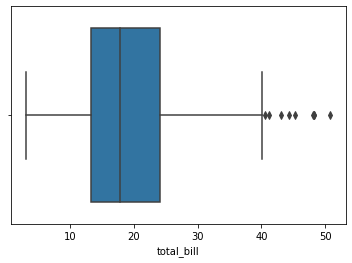

In [17]:
sns.boxplot(x=df.total_bill); # default olarak grafik yatay gelir

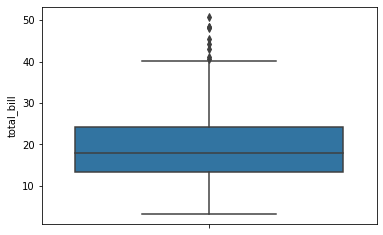

In [18]:
sns.boxplot(x=df.total_bill, orient='v'); # grafiği dikey olarak görmek istersek

### Boxplot Çaprazlamalar

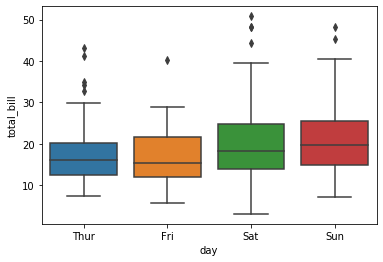

In [30]:
# hangi günler daha fazla kazanıyoruz?

sns.boxplot(x='day', # x ekseni
            y='total_bill', # y ekseni (ortalamalar)
            data=df); # hangi data

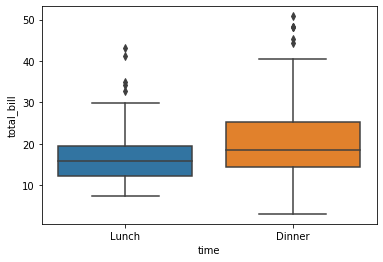

In [31]:
# sabah mı yoksa akşam mı daha çok kazanıyoruz?

sns.boxplot(x='time', 
            y='total_bill',
            data=df);

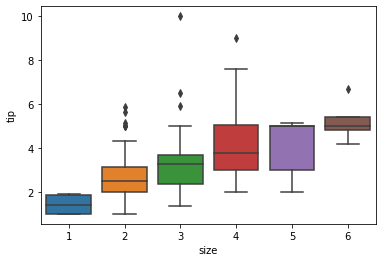

In [36]:
# yemeğe gelen grupların kişi sayısı ile kazanç doğru orantılı mı?

sns.boxplot(x='size',y='tip',data=df);

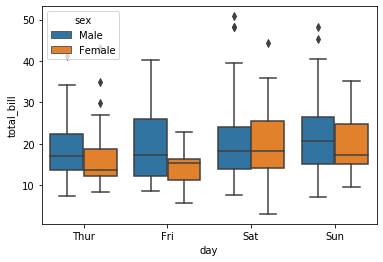

In [39]:
# hangi günlerde hangi cinsiyetlerden daha çok kazanıyoruz

sns.boxplot(x='day', 
            y='total_bill', 
            hue='sex', # 3. boyutu cinsiyet değişkenini (kategorik) ekliyoruz
            data=df);

## Violin
- Sayısal (sürekli) değişkenlerin dağılımını inceleriz
- Biraz daha dağılım alanında bilgi sahibi oluruz
- Yoğunluk grafiği ile kutu grafiğinin kesişimi olarak düşünebiliriz

In [41]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


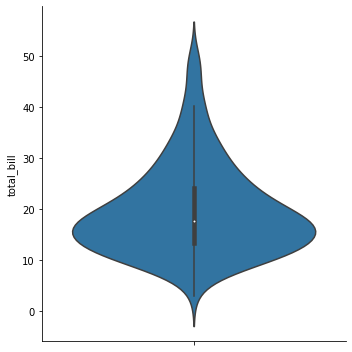

In [43]:
sns.catplot(y='total_bill',
            kind='violin', # grafiğin tipini belirtiyoruz
            data=df);

### Violin Çaprazlamalar

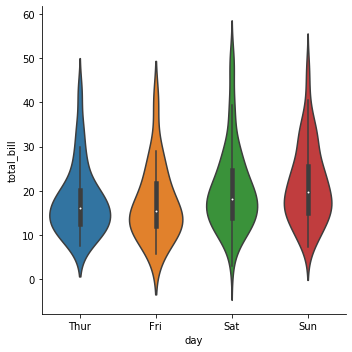

In [45]:
sns.catplot(y='total_bill',
            x='day', # kategorik değişkeni ekliyoruz
            kind='violin', # grafiğin tipini belirtiyoruz
            data=df);

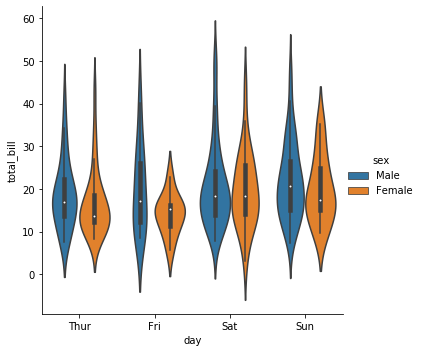

In [47]:
sns.catplot(y='total_bill',
            x='day', 
            kind='violin', 
            hue='sex', # cinsiyet boyutunu ekliyoruz
            data=df);

# Korelasyon Grafikleri

## Veri Seti Hikayesi

In [48]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Scatterplot
- Sayısal değişkenler arasındaki ilişkiyi gösteren bir saçılım grafiğidir.

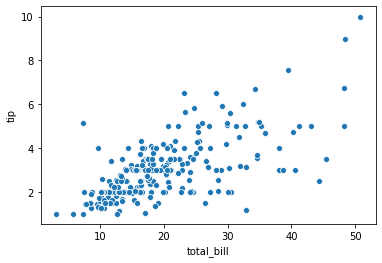

In [51]:
sns.scatterplot(x = 'total_bill',y='tip',data=df);
# bu tabloya göre toplam hesap (total_bill) arttıkça verilen bahşiş (tip) artmaktadır

### Scatterplot Çaprazlama

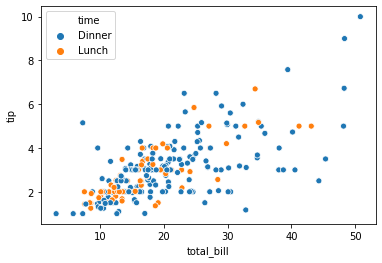

In [59]:
sns.scatterplot(x = 'total_bill',
                y='tip',
                hue='time',
                data=df);
# bu tabloya göre akşam yemeklerinde toplam hesap arttıkça verilen bahşiş artmaktadır

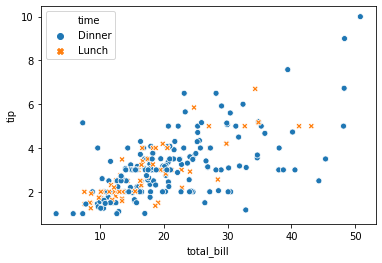

In [61]:
sns.scatterplot(x = 'total_bill',
                y='tip',
                hue='time',
                style='time', # time kategorik değişkenine göre işaretleri değiştirir
                data=df);

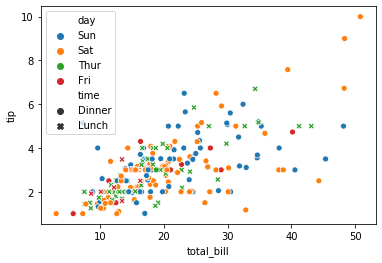

In [63]:
sns.scatterplot(x = 'total_bill',
                y='tip',
                hue='day',
                style='time', # 4. boyutu ekledik gibi düşünebiliriz, artık grafikte hem 'time' hem de 'day' kategorik değişkenleri var
                data=df);

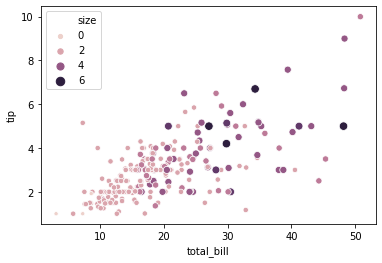

In [68]:
sns.scatterplot(
            x = 'total_bill',
            y='tip',
            hue='size',
            size='size', # sayısal bir değişkeni boyut olarak ekliyoruz. Yuvarlak arttıkça kişi sayısı (size) artmaktadır
            data=df
);

### Doğrusal İlişkinin Gösterilmesi

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
tips = sns.load_dataset('tips')
df = tips.copy()

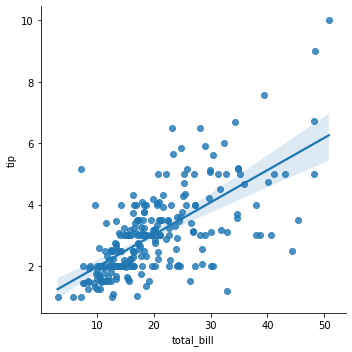

In [72]:
sns.lmplot(x = 'total_bill', y = 'tip', data=df);
# toplam hesap arttıkça verilen bahşiş artmaktadır

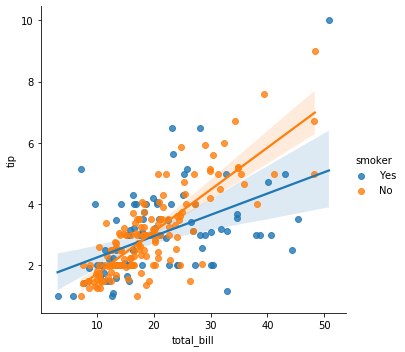

In [74]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = df);
# bu tabloya göre;
# sigara içmeyenlerin ödedeği hesap arttıkça verdikleri bahşiş artmaktadır
# sigara içenlerin ödedikleri hesap arttıkça verdikleri bahşiş azalmaktadır

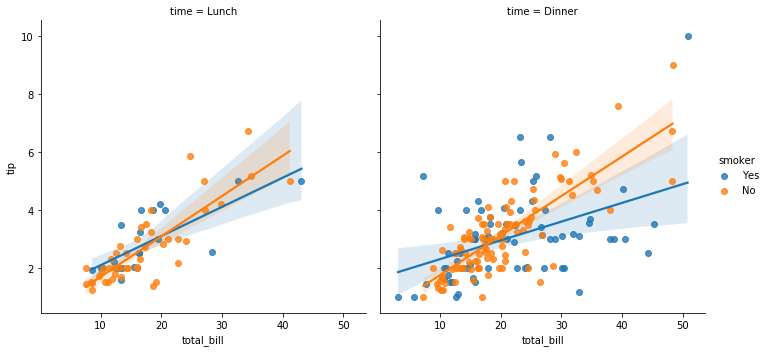

In [84]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = df); # col argümanı verilen KATEGORİK değişkenin sınıf sayısı kadar farklı grafiğe dönüştürür
# Bu tabloya göre;
# Sigara içmeyenlerin öğle yemeklerinde ve akşam yemeklerinde ödedeği hesap arttıkça verdikleri bahşiş artmaktadır
# Sigara içenlerin akşam yemeklerinde ödedikleri hesap arttıkça verdikleri bahşiş azalmaktadır

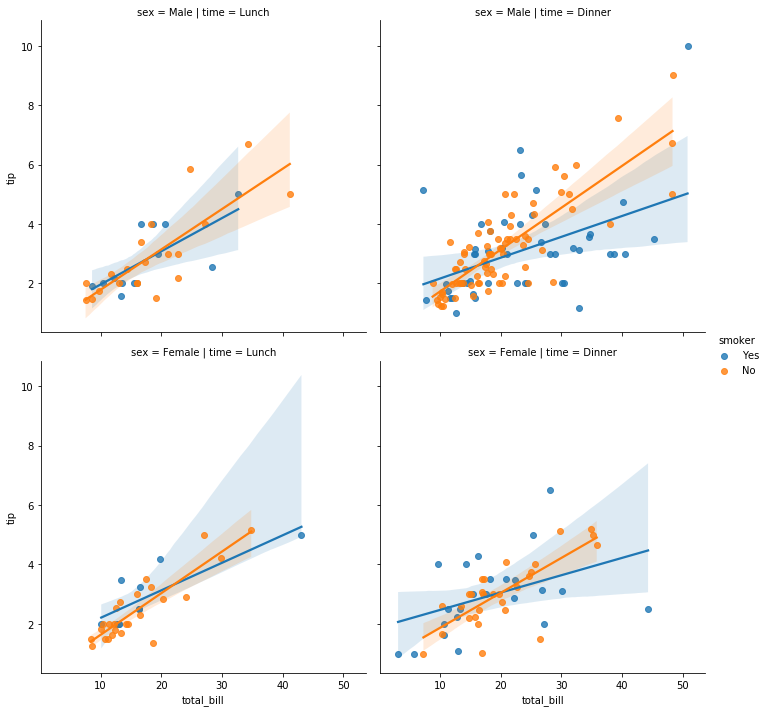

In [86]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', row = 'sex', data = df); # row argümanı aldığı KATEGORİK değişkenin sınıflarına göre grafik çıkartır
# satırlara göre cinsiyeti (sex), sütunlara göre de zamanı (time) okumamız gerekmektedir

### Scatterplot Matrisi
- Veri seti içerisindeki tüm sayısal değişkenleri matris formunda ifade etmeye scatterplot matrisi denir.

In [87]:
import seaborn as sns
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
df.dtypes # değişkenlerin tipleri

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [92]:
df.shape # kaç gözlem kaç sütun

(150, 5)

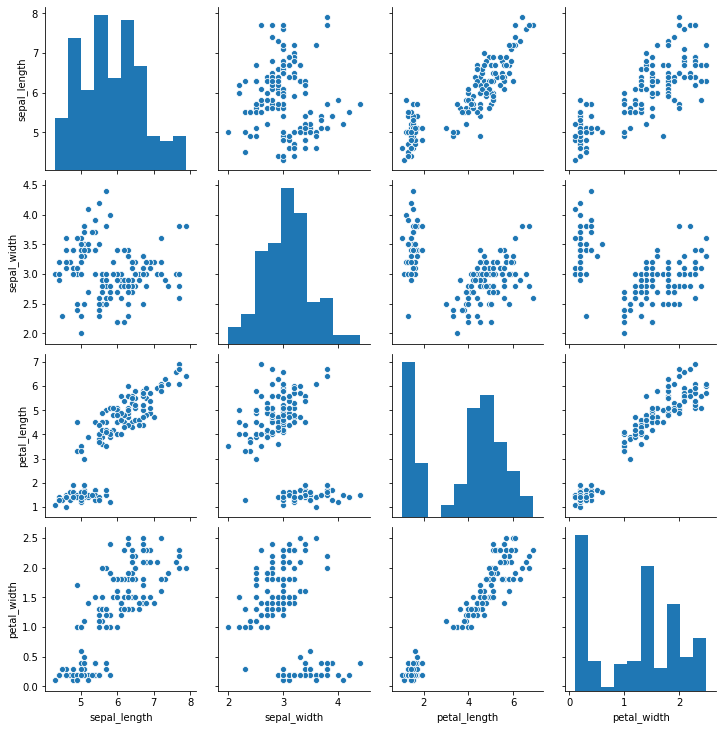

In [94]:
sns.pairplot(df);

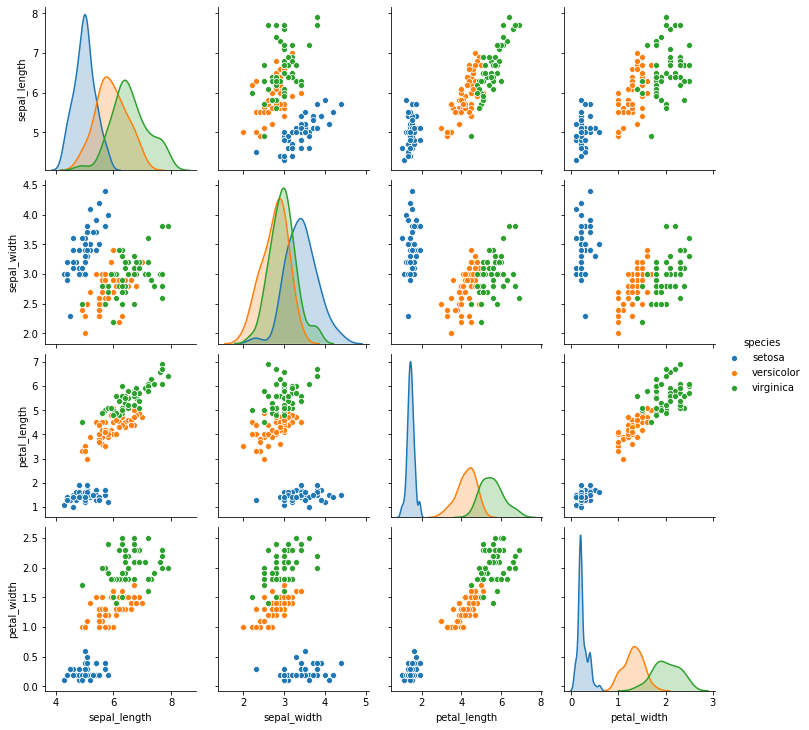

In [96]:
sns.pairplot(data=df,hue='species'); # hue ile bir KATEGORİK değişkeni boyut olarak ekledik

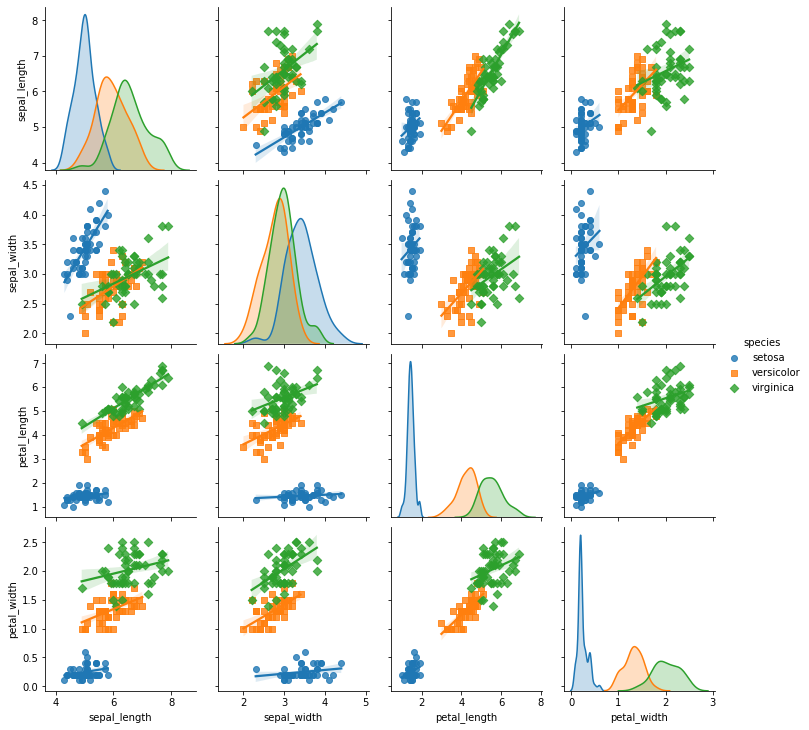

In [99]:
sns.pairplot(data=df,kind='reg',hue='species', markers=['o','s','D']);
# kind ile doğrusal ilişkiyi gösterebiliriz
# markers ile pairplot fonksiyonuna ait ön tanımlı işaretleyicileri kullanabiliriz

## Heatmap (Isı Haritası)
- Elimizdeki değişkenleri yapısal anlamda daha geniş perspektifte görebiliriz
- Uzun vadeli verilerde (gün ay yıl) veya belirli periyotlarla tekrar eden olayları tekrar etmek istersek çok işimize yarar
- Sadece zamansal değil, çok sınıflı bir kategorik değişkeni görselleştirmek istersek de çok işimize yarar

In [107]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [108]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [109]:
df = df.pivot('month','year','passengers')
# ilk parametre x ekseni
# ikinci parametre y ekseni
# üçüncü parametre kesişim

In [110]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


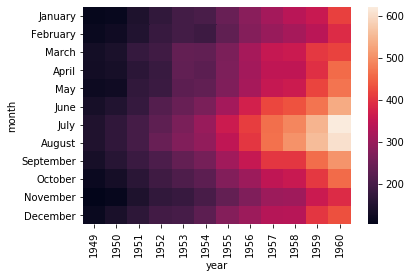

In [113]:
sns.heatmap(df); # pivot table kabul etmektedir
# bu grafiğe göre zaten her yıl geçtikçe uçuşlar artmakta
# her yılı kendi içerisinde değerlendirdiğimizde en çok uçuş 1960 yılında July ve August'ta olmuştur

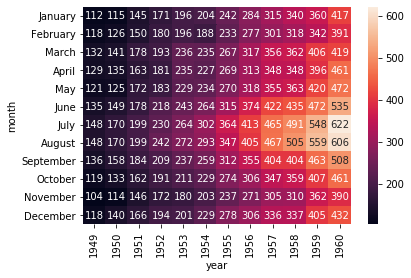

In [115]:
sns.heatmap(df, annot = True, fmt = 'd');
# hücrelere değerlerini veriyoruz

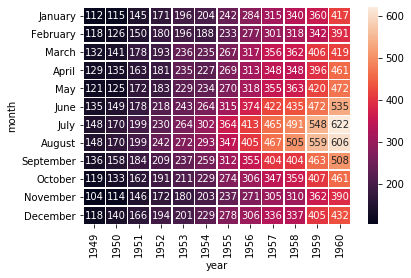

In [117]:
sns.heatmap(df, annot = True, fmt = 'd', linewidths=0.5);
# linewidths ile hücreler arasındaki çizgi boyutunu belirleyebiliriz 

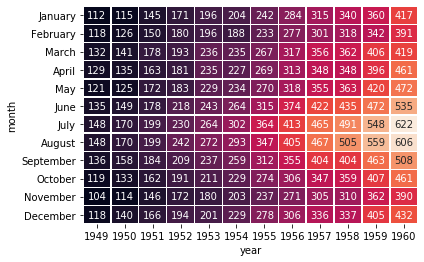

In [118]:
sns.heatmap(df, annot = True, fmt = 'd', linewidths=0.5, cbar=False);
# cbar = False ile yandaki renk scalası kalkmış olur

## Veri Seti Hikayesi

In [123]:
import seaborn as sns
fmri = sns.load_dataset('fmri')
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [125]:
df.groupby('timepoint')['signal'].count()
# timepoint'lere göre signal'i grupla ve kaçar tane var say

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [128]:
df.groupby('timepoint')['signal'].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Line Plot (Çizgi Grafik)
- Daha çok zamana bağlı değişkenlerin olduğu veya IOT (nesnelerin interneti) veri setlerinde kullanılır

In [129]:
import seaborn as sns
fmri = sns.load_dataset('fmri')
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


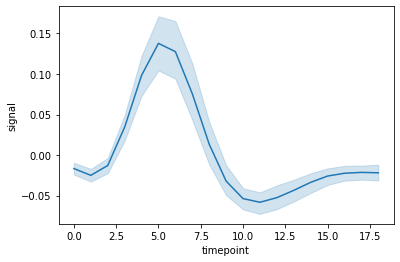

In [132]:
sns.lineplot(x='timepoint',y='signal',data=df);

### Line Plot Çaprazlamalar

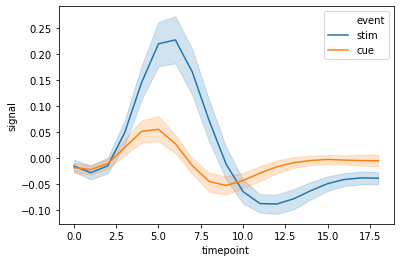

In [138]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data = df);
# hue ile bir boyut ekliyoruz

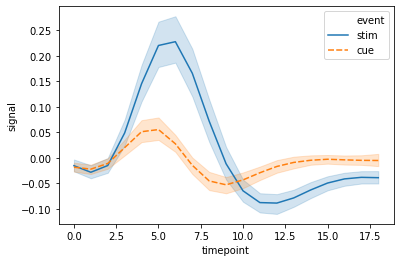

In [141]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', data = df);
# style ile ilgili parametreye göre çizgileri özelleştirir

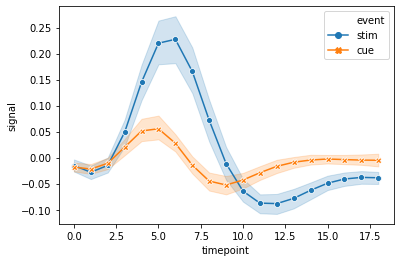

In [143]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', markers = True, dashes = False, data = df);
# ortalama değerleri işaretler

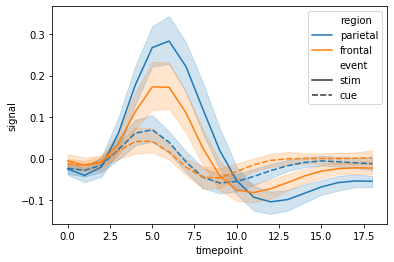

In [145]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', data = df);
# hem 'region' hem de 'event' kategorik değişkenlerine göre görselleştirme

## Basit Zaman Serisi Grafiği

In [164]:
!pip install pandas_datareader
import pandas_datareader as pr
import pandas as pd

In [165]:
df = pr.get_data_yahoo('AAPL', start = '2016-01-01', end = '2020-06-23')
# apple hisse senetlerini df'e atadık

In [166]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.443037
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.830513
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.364161
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.378082
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.496408


In [167]:
df.shape

(1126, 6)

In [168]:
kapanis = df.Close

In [169]:
kapanis

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
                ...    
2020-06-17    87.897499
2020-06-18    87.932503
2020-06-19    87.430000
2020-06-22    89.717499
2020-06-23    91.632500
Name: Close, Length: 1126, dtype: float64

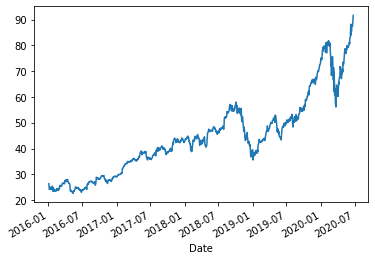

In [170]:
kapanis.plot();

In [171]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [172]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-23'],
              dtype='datetime64[ns]', name='Date', length=1126, freq=None)

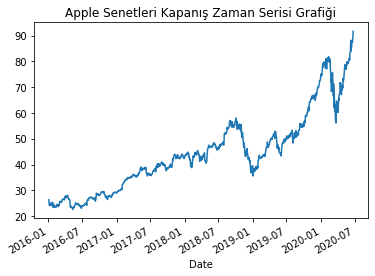

In [180]:
kapanis.plot().set_title('Apple Senetleri Kapanış Zaman Serisi Grafiği');

# Seaborn

## Distplot
- Dağılımlar için

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset('penguins')
df = penguins.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


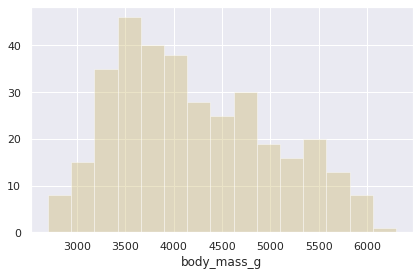

In [27]:
sns.set(style='darkgrid', # grafik stilini değiştirir
        font_scale=1, # grafikteki yazı fontları değişir
       )
sns.distplot(df.body_mass_g, # hangi değişken
             bins=15,  # kaç sütun
             color='y', # hangi renk
             kde=False, # yoğunluğu eklesin mi
            );
plt.tight_layout() # x ekseninde tüm değerleri getir


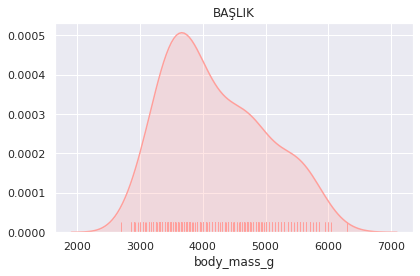

In [51]:
sns.set(style='darkgrid', 
        font_scale=1,
        palette = 'husl' # renk kombinasyonu seçimi (https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
       )
sns.distplot(df.body_mass_g,
             color='r',
             hist = False, # sütunları kaldırır
             rug = True, # her veri için x eksenine bir çizgi çeker
             kde_kws={'shade':True}, # yoğunluk arka planını doldurur
            ).set_title('BAŞLIK'); # Başlık ekler
plt.tight_layout()

### Çoklu Grafik Birleştirme

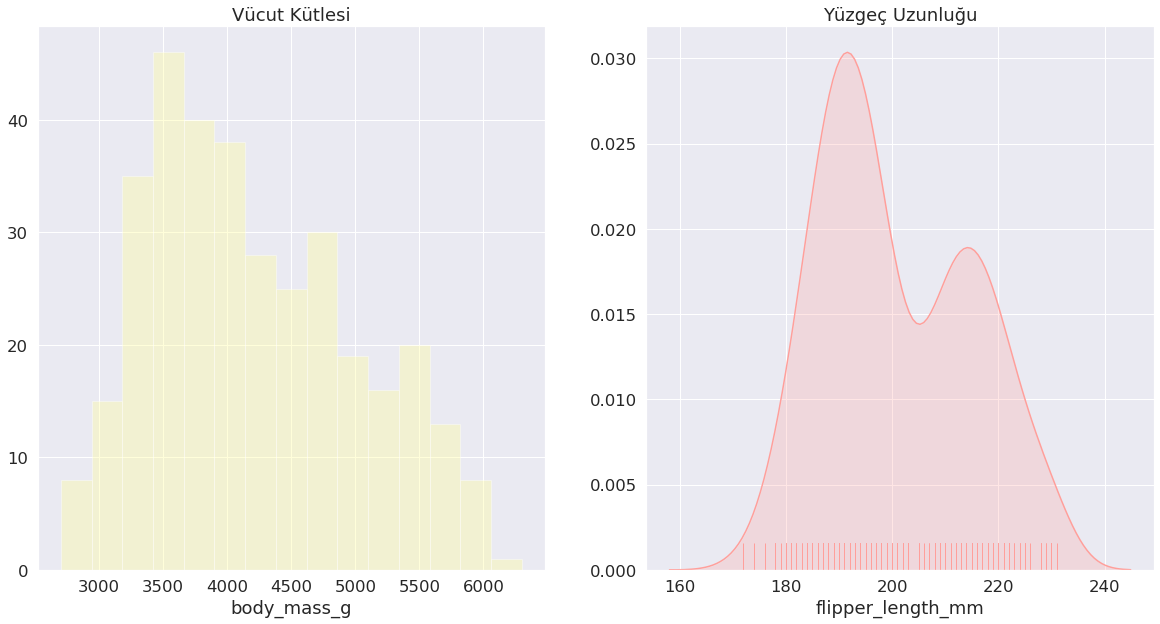

In [67]:
sns.set(style = 'darkgrid', font_scale= 1.5, palette='husl') # ana grafiği oluşturuyoruz

f, axes = plt.subplots(1,2,figsize=(20,10)) # 1 satır 2 sütun (1e 2lik grafik) ve 15e 10 grafikler

sns.distplot(df.body_mass_g, 
             bins=15,  
             color='y', 
             kde=False,
             ax = axes[0] # tek satır olduğu için, 2 satır olsaydı (matris) o zaman [satır,sütun] olarak belirtmeliydik
            ).set_title('Vücut Kütlesi')

sns.distplot(df.flipper_length_mm,
             color='r',
             hist = False, 
             rug = True,
             kde_kws={'shade':True},
             ax = axes[1]
            ).set_title('Yüzgeç Uzunluğu');

## Jointplot
- İki değişkeni (sayısal) karşılaştırırız

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.dropna(how='any',inplace=True) # NaN verileri atıyoruz
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


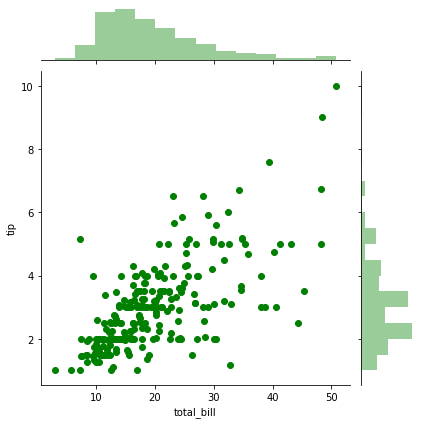

In [9]:
sns.jointplot(x = 'total_bill',# x ekseni
              y = 'tip', # y ekseni
              data = df, # hangi veri seti
              color = 'g', # rengi değiştirebiliriz
             );

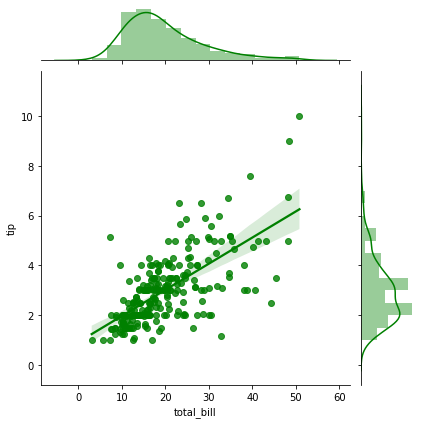

In [10]:
sns.jointplot(x = 'total_bill',
              y = 'tip', 
              data = df, 
              color = 'g', 
              kind = 'reg', # grafiğin türünü verebiliriz
             );

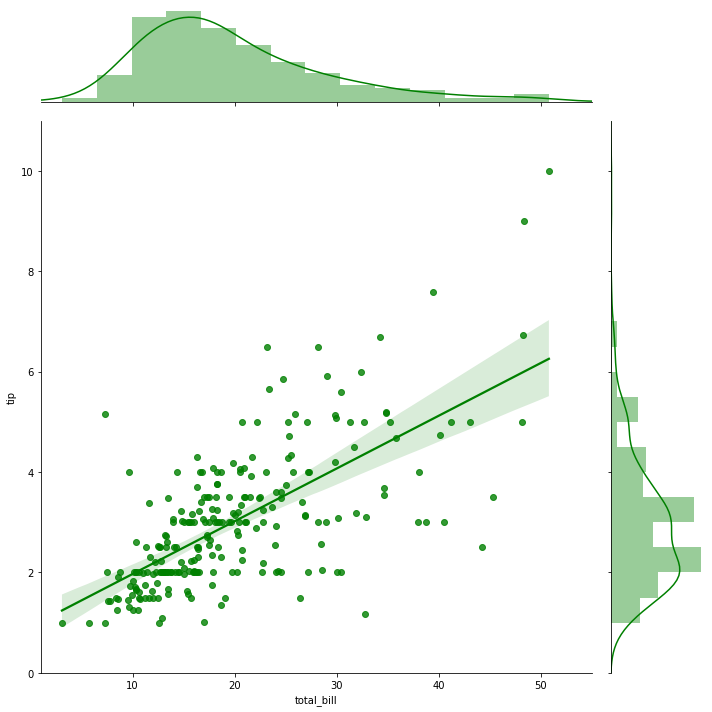

In [20]:
sns.jointplot(x = 'total_bill',
              y = 'tip', 
              data = df, 
              color = 'g', 
              kind = 'reg',
              xlim = (1,55), # x, 1 ile 55 arasında olsun
              ylim = (0,11), # y, 0 ile 11 arasında olsun
              height = 10, # yüksekliği set edebiliriz
             );

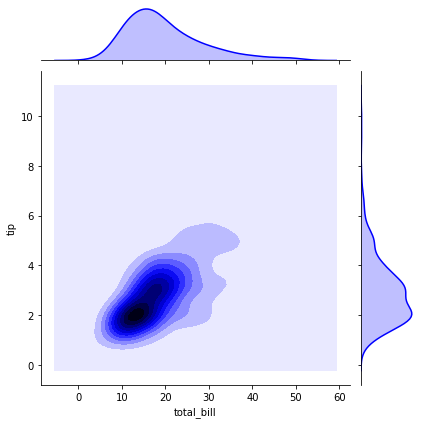

In [21]:
sns.jointplot(x = 'total_bill',
              y = 'tip', 
              data = df, 
              color = 'b', 
              kind = 'kde', # tip değişti
             );

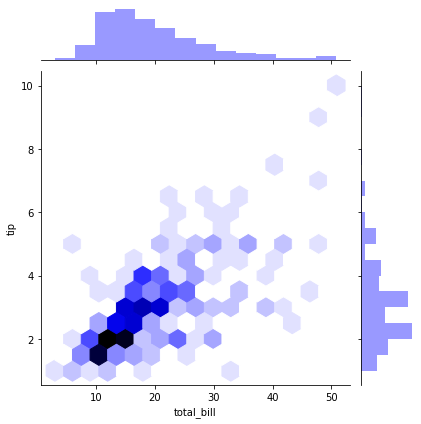

In [22]:
sns.jointplot(x = 'total_bill',
              y = 'tip', 
              data = df, 
              color = 'b', 
              kind = 'hex', # tip değişti
             );

## Kdeplot
- Sayısal değişkenlerin olasılık yoğunluğu

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


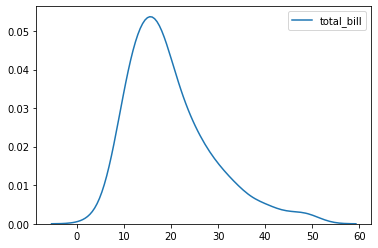

In [2]:
sns.kdeplot(df.total_bill); # tek değişken için

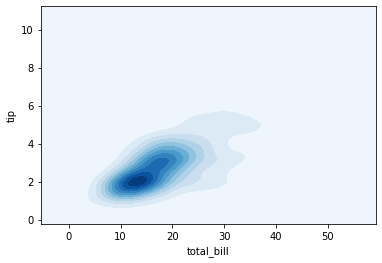

In [7]:
# 2 sayısal değişkeni kıyaslama
sns.kdeplot(df.total_bill, # x ekseni
            df.tip, # y ekseni
            shade = True, # gölgeleri doldurur
            cmap = 'Blues', # renk kombinasyonu
           ); 

## Pairplot
- Veri setindeki sayısal değişkenler arasındaki ikili ilişkileri görselleştirir

In [10]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


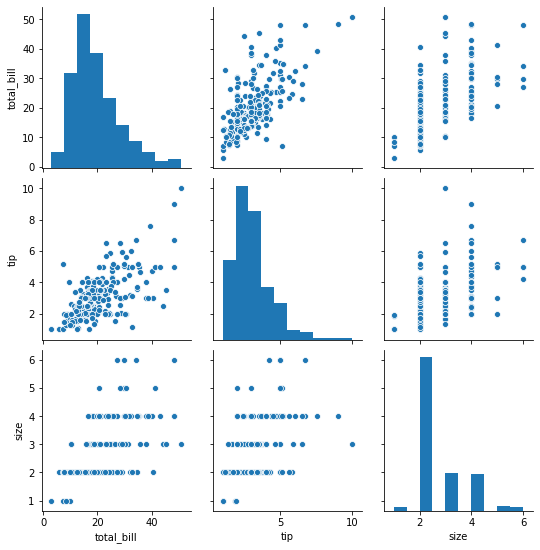

In [14]:
sns.pairplot(df, # hangi veri seti
             palette = '#95a5a6', # renk paleti
            );

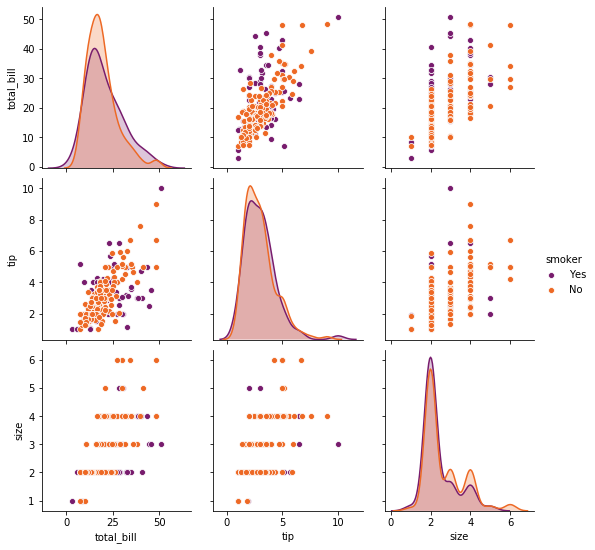

In [21]:
sns.pairplot(df,
             palette = 'inferno',
             hue = 'smoker', # kategorik bir değişkene göre sınıflayabiliriz
            );

## Rugplot
- Veri setindeki elemanları x ekseninde işaretler

In [22]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


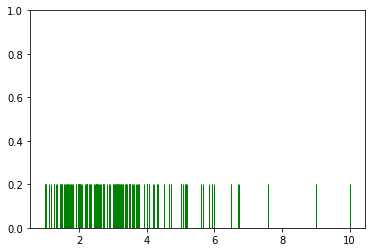

In [25]:
sns.rugplot(df.tip, # hangi değişken
            color='g', # renk
            height=0.2 # çizgilerin uzunluğu
           );

### İç içe Rugplot ve Kdeplot

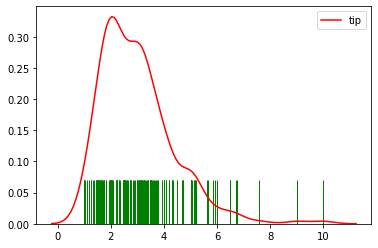

In [27]:
sns.rugplot(df.tip,
            color='g',
            height=0.2
           );
sns.kdeplot(df.tip,color='r',);

## Boxplot
- İki değişken arasındaki ilişkiyi görselleştirir
- x -> kategorik, y -> sayısal

In [31]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


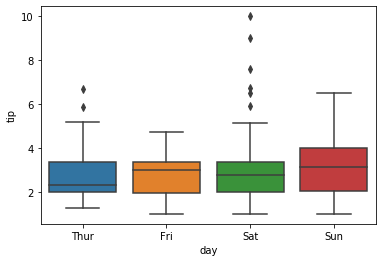

In [33]:
sns.boxplot(x='day', # x ekseni
            y='tip', # y ekseni
            data=df # hangi veri seti
           );

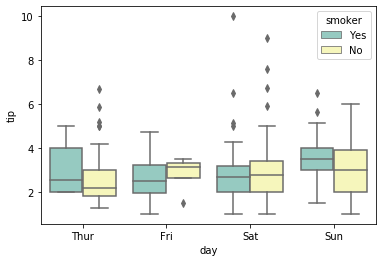

In [38]:
sns.boxplot(x='day',
            y='tip',
            hue = 'smoker', # 3. kategorik değişkenin sınıflarına göre
            data=df,
            palette='Set3', # renk kombinasyonu
           );